In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 

# estbalish csv path
survey_data_path = '../resources/survey-data.csv'

# read csv in as a pandas data frame
survey_data_df = pd.read_csv(survey_data_path)

# check if csv was read in correctly
survey_data_df.head()

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,IL,NaN,No,Yes,Often,25-Feb,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,NaN,No,No,Rarely,25-Feb,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


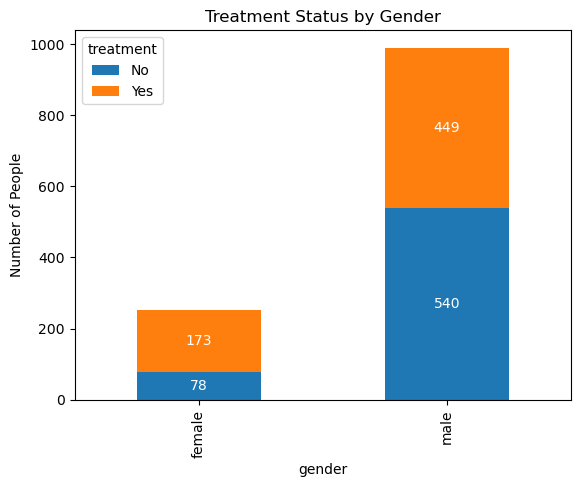

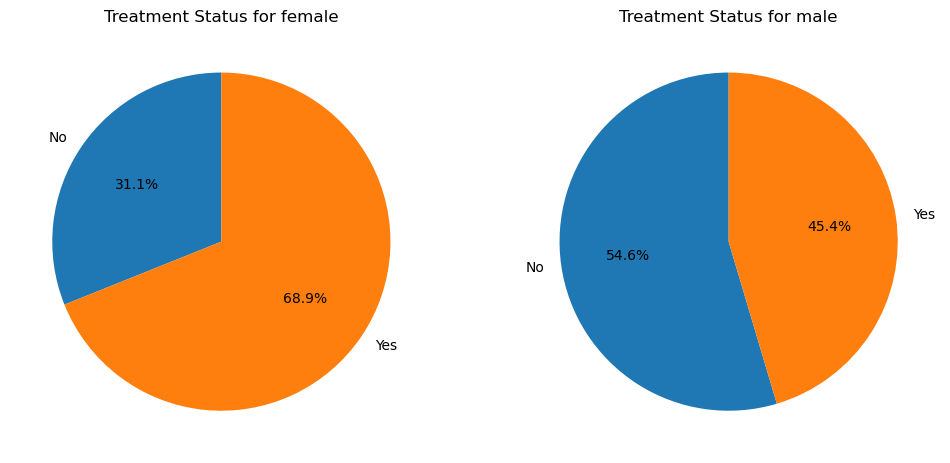

Chi-square value: 43.38082643958715
P-value: 4.5058162382400003e-11


In [3]:
# groupby 'gender' and 'treatment', and count occurrences
gender_treatment_counts = survey_data_df.groupby(['gender', 'treatment']).size().unstack().fillna(0)

# plot bar chart
ax = gender_treatment_counts.plot(kind='bar', stacked=True)
ax.set_ylabel('Number of People')
ax.set_title('Treatment Status by Gender')

# add annotations to bars within the bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

# plot pie chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, gender in enumerate(gender_treatment_counts.index):
    gender_data = gender_treatment_counts.loc[gender]
    axes[i].pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Treatment Status for {gender}')

# show charts
plt.show()

# create a contingency table for stat calcs
contingency_table = pd.crosstab(survey_data_df['gender'], survey_data_df['treatment'])

# perform chi-square test
chi2, p, _, _ = st.chi2_contingency(contingency_table)

# print results of stat calcs
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

In [96]:
# count occurrences for'family history' and 'treatment'

#count the number of people with family history that have sought treatment
family_history_treatment = len(survey_data_df[(survey_data_df['family_history'] == 'Yes') & (survey_data_df['treatment'] == 'Yes')])

#count the number of people with family history
family_history_count = len(survey_data_df[survey_data_df['family_history'] == 'Yes'])

#count the number of people without family history that have sought treatment
no_family_history_treatment = len(survey_data_df[(survey_data_df['family_history'] == 'No') & (survey_data_df['treatment'] == 'Yes')]) 

#count the number of people that not have sought treatment with family history
no_family_history_count = len(survey_data_df[survey_data_df['family_history'] == 'No']) 

#count the number of people with family history that have not sought treatment
family_history_no_treatment = len(survey_data_df[(survey_data_df['family_history'] == 'Yes') & (survey_data_df['treatment'] == 'No')])


percentage_family_history_treatment = (family_history_treatment / family_history_count) * 100
percentage_no_family_history_treatment = (no_family_history_treatment / no_family_history_count) * 100
percentage_family_history_no_treatment = ((family_history_count - family_history_treatment) / family_history_count) * 100

# Calculate the percentage of people seeking or not seeking treatment with and without family history
print(f'Percentage of people with family history seeking treatment: {percentage_family_history_treatment}')
print(f'Percentage of people without family history seeking treatment: {percentage_no_family_history_treatment}')    
print(f'Percentage of people with family history not seeking treatment: {percentage_family_history_no_treatment}')        
     


Percentage of people with family history seeking treatment: 73.8045738045738
Percentage of people without family history seeking treatment: 35.177865612648226
Percentage of people with family history not seeking treatment: 26.195426195426197


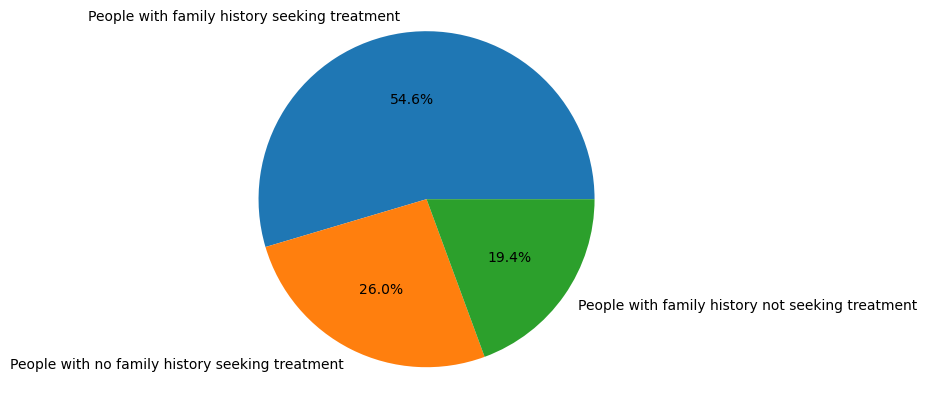

In [101]:
#Create Pie Chart

labels = 'People with family history seeking treatment', 'People with no family history seeking treatment', 'People with family history not seeking treatment'
sizes = round(percentage_family_history_treatment, 2), round(percentage_no_family_history_treatment, 2), round(percentage_family_history_no_treatment, 2)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  
plt.show()

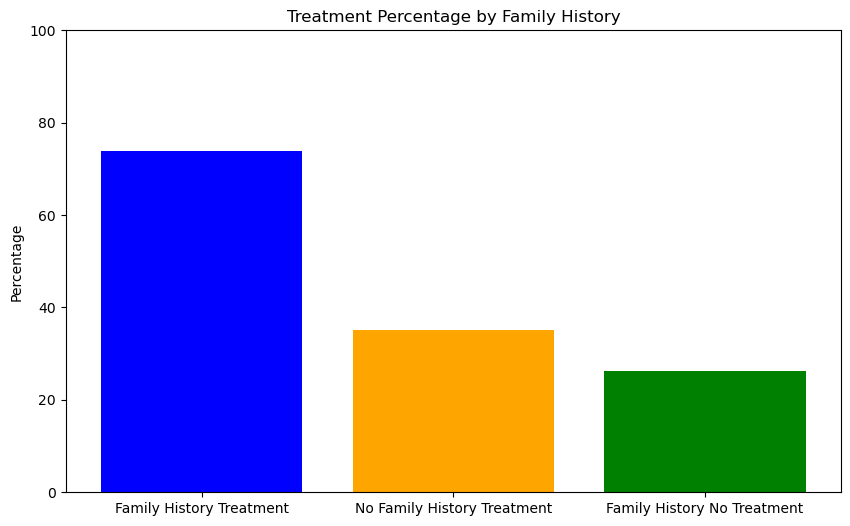

In [98]:
# Bar chart
labels = ['Family History Treatment', 'No Family History Treatment', 'Family History No Treatment']
percentages = round(percentage_family_history_treatment, 2), round(percentage_no_family_history_treatment, 2), round(percentage_family_history_no_treatment, 2)

# Set a larger figure size
plt.figure(figsize=(10, 6))

plt.bar(labels, percentages, color=['blue', 'orange', 'green'])
plt.ylabel('Percentage')
plt.title('Treatment Percentage by Family History')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.show()

In [103]:
# Calculate the counts for each combination of 'benefits' and 'treatment'
counts = survey_data_df.groupby(['benefits', 'treatment']).size()

# Calculate the total count of people with benefits
total_with_benefits = counts.loc['Yes'].sum()

# Calculate the total count of people without benefits
total_without_benefits = counts.loc['No'].sum()

# Calculate the percentage of people seeking or not seeking treatment with and without benefits
percentage_with_benefits_treatment = (counts.loc[('Yes', 'Yes')] / total_with_benefits) * 100
percentage_with_benefits_no_treatment = (counts.loc[('Yes', 'No')] / total_with_benefits) * 100
percentage_without_benefits_treatment = (counts.loc[('No', 'Yes')] / total_without_benefits) * 100

# Print the percentages
print(f'Percentage of people with benefits seeking treatment: {percentage_with_benefits_treatment:.2f}%')
print(f'Percentage of people with benefits not seeking treatment: {percentage_with_benefits_no_treatment:.2f}%')
print(f'Percentage of people without benefits seeking treatment: {percentage_without_benefits_treatment:.2f}%')

Percentage of people with benefits seeking treatment: 63.68%
Percentage of people with benefits not seeking treatment: 36.32%
Percentage of people without benefits seeking treatment: 47.83%


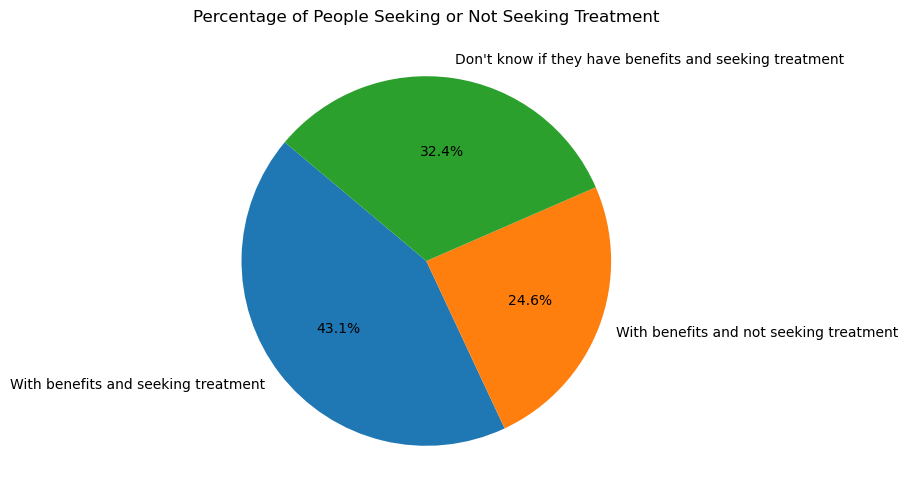

In [104]:
# Data for the pie chart
labels = ['With benefits and seeking treatment', 
          'With benefits and not seeking treatment', 
          "Don't know if they have benefits and seeking treatment"]

sizes = [percentage_with_benefits_treatment,
         percentage_with_benefits_no_treatment,
         percentage_without_benefits_treatment]


# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of People Seeking or Not Seeking Treatment')
plt.show()

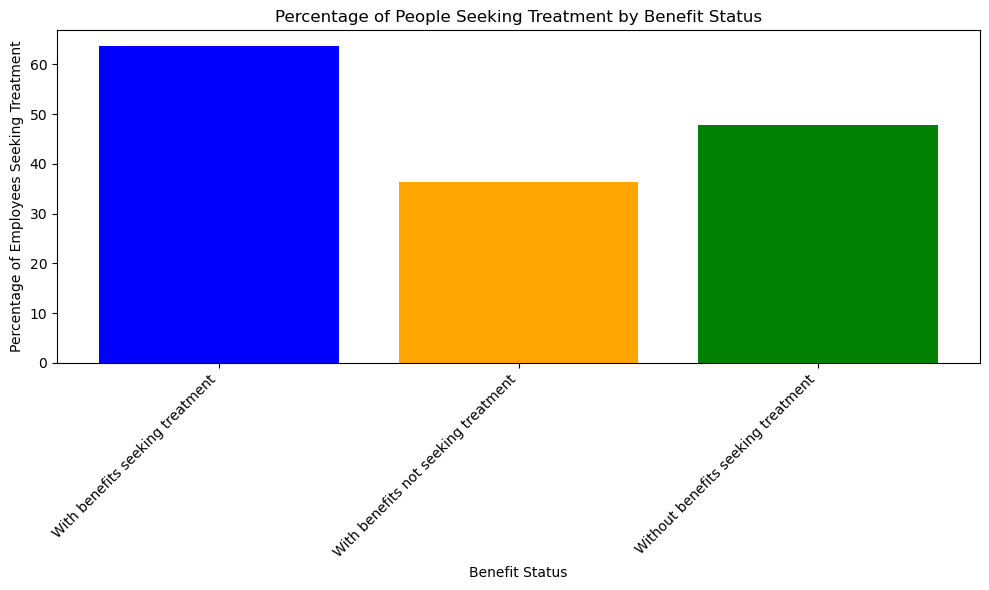

In [108]:
# Data
labels = ['With benefits seeking treatment', 'With benefits not seeking treatment', 'Without benefits seeking treatment']
percentages = [percentage_with_benefits_treatment, percentage_with_benefits_no_treatment, percentage_without_benefits_treatment]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, percentages, color=['blue', 'orange', 'green'])
plt.xlabel('Benefit Status')
plt.ylabel('Percentage of Employees Seeking Treatment')
plt.title('Percentage of People Seeking Treatment by Benefit Status')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()